# Imports

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Loading CSVs

In [3]:
players = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/Football_Players_Stats_2024_2025/player_eval.csv')

In [4]:
players.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,G+A-PK,xG+xAG,Rk_stats_shooting,Nation_stats_shooting,Pos_stats_shooting,Comp_stats_shooting,Age_stats_shooting,Born_stats_shooting,90s_stats_shooting,Gls_stats_shooting,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK_stats_shooting,PKatt_stats_shooting,xG_stats_shooting,npxG_stats_shooting,npxG/Sh,G-xG,np:G-xG,Rk_stats_passing,Nation_stats_passing,Pos_stats_passing,Comp_stats_passing,Age_stats_passing,Born_stats_passing,90s_stats_passing,Cmp,Att,Cmp%,TotDist,PrgDist,Ast_stats_passing,xAG_stats_passing,xA,A-xAG,KP,01-Mar,PPA,CrsPA,PrgP_stats_passing,Rk_stats_passing_types,Nation_stats_passing_types,Pos_stats_passing_types,Comp_stats_passing_types,Age_stats_passing_types,Born_stats_passing_types,90s_stats_passing_types,Att_stats_passing_types,Live,Dead,FK_stats_passing_types,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp_stats_passing_types,Off,Blocks,Rk_stats_gca,Nation_stats_gca,Pos_stats_gca,Comp_stats_gca,Age_stats_gca,Born_stats_gca,90s_stats_gca,SCA,SCA90,PassLive,PassDead,TO,Sh_stats_gca,Fld,Def,GCA,GCA90,Rk_stats_defense,Nation_stats_defense,Pos_stats_defense,Comp_stats_defense,Age_stats_defense,Born_stats_defense,90s_stats_defense,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Att_stats_defense,Tkl%,Lost,Blocks_stats_defense,Sh_stats_defense,Pass,Int,Tkl+Int,Clr,Err,Rk_stats_possession,Nation_stats_possession,Pos_stats_possession,Comp_stats_possession,Age_stats_possession,Born_stats_possession,90s_stats_possession,Touches,Def Pen,Def 3rd_stats_possession,Mid 3rd_stats_possession,Att 3rd_stats_possession,Att Pen,Live_stats_possession,Att_stats_possession,Succ,Succ%,Tkld,Tkld%,Carries,TotDist_stats_possession,PrgDist_stats_possession,PrgC_stats_possession,1/3_stats_possession,CPA,Mis,Dis,Rec,PrgR_stats_possession,Rk_stats_playing_time,Nation_stats_playing_time,Pos_stats_playing_time,Comp_stats_playing_time,Age_stats_playing_time,Born_stats_playing_time,MP_stats_playing_time,Min_stats_playing_time,Mn/MP,Min%,90s_stats_playing_time,Starts_stats_playing_time,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,Rk_stats_misc,Nation_stats_misc,Pos_stats_misc,Comp_stats_misc,Age_stats_misc,Born_stats_misc,90s_stats_misc,CrdY_stats_misc,CrdR_stats_misc,2CrdY,Fls,Fld_stats_misc,Off_stats_misc,Crs_stats_misc,Int_stats_misc,TklW_stats_misc,PKwon,PKcon,OG,Recov,Won,Lost_stats_misc,Won%,Rk_stats_keeper,Nation_stats_keeper,Pos_stats_keeper,Comp_stats_keeper,Age_stats_keeper,Born_stats_keeper,MP_stats_keeper,Starts_stats_keeper,Min_stats_keeper,90s_stats_keeper,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt_stats_keeper,PKA,PKsv,PKm,Rk_stats_keeper_adv,Nation_stats_keeper_adv,Pos_stats_keeper_adv,Comp_stats_keeper_adv,Age_stats_keeper_adv,Born_stats_keeper_adv,90s_stats_keeper_adv,GA_stats_keeper_adv,PKA_stats_keeper_adv,FK_stats_keeper_adv,CK_stats_keeper_adv,OG_stats_keeper_adv,PSxG,PSxG/SoT,PSxG+/-,/90,Cmp_stats_keeper_adv,Att_stats_keeper_adv,Cmp%_stats_keeper_adv,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist,Market Value,Market Value Euros
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,25,2000,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,8,3,0.0,0.00,1,eng ENG,DF,eng Premier League,25-051,2000,1.0,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,1,eng ENG,DF,eng Premier League,25-051,2000,1.0,50,63,79.4,887,361,0,0.0,0.0,0.0,0,8,0,0,8,1,eng ENG,DF,eng Premier League,25-051,2000,1.0,63,51,12,2,0,0,2,10,0,0,0,0,50,0,1,1,eng ENG,DF,eng Premier League,25-051,2000,1.0,2,2.09,2,0,0,0,0,0,0,0.0,1,eng ENG,DF,eng Premier League,25-051,2000,1.0,2,2,1,1,0,1,100.0,0,3,1,2,1,3,0,0,1,eng ENG,DF,eng Premier League,25-051,2000,1.0,73,2,19,40,15,0,73,2,0,0.0,1,50.0,41,152,68,1,0,0,1,0,40,3,1,eng ENG,DF,eng Premier League,25-051,2000,3,86,29,3.7,1.0,1,61.0,0,2,13.0,11,0.67,2,0,2,2.09,1.61,2.3,0.3,2.0,2.12,1,eng ENG,DF,eng Premier League,25-051,2000,1.0,0,0,0,0,2,0,2,1,2,0,0,0,7,0,0,

In [5]:
players.shape

(2004, 269)

# Dropping Columns & Imputing Nulls

In [6]:
print("\n".join(players.columns))

Rk
Player
Nation
Pos
Squad
Comp
Age
Born
MP
Starts
Min
90s
Gls
Ast
G+A
G-PK
PK
PKatt
CrdY
CrdR
xG
npxG
xAG
npxG+xAG
PrgC
PrgP
PrgR
G+A-PK
xG+xAG
Rk_stats_shooting
Nation_stats_shooting
Pos_stats_shooting
Comp_stats_shooting
Age_stats_shooting
Born_stats_shooting
90s_stats_shooting
Gls_stats_shooting
Sh
SoT
SoT%
Sh/90
SoT/90
G/Sh
G/SoT
Dist
FK
PK_stats_shooting
PKatt_stats_shooting
xG_stats_shooting
npxG_stats_shooting
npxG/Sh
G-xG
np:G-xG
Rk_stats_passing
Nation_stats_passing
Pos_stats_passing
Comp_stats_passing
Age_stats_passing
Born_stats_passing
90s_stats_passing
Cmp
Att
Cmp%
TotDist
PrgDist
Ast_stats_passing
xAG_stats_passing
xA
A-xAG
KP
01-Mar
PPA
CrsPA
PrgP_stats_passing
Rk_stats_passing_types
Nation_stats_passing_types
Pos_stats_passing_types
Comp_stats_passing_types
Age_stats_passing_types
Born_stats_passing_types
90s_stats_passing_types
Att_stats_passing_types
Live
Dead
FK_stats_passing_types
TB
Sw
Crs
TI
CK
In
Out
Str
Cmp_stats_passing_types
Off
Blocks
Rk_stats_gca
Nation_sta

In [7]:
players.isnull().sum()

Rk                               0
Player                           0
Nation                           0
Pos                              0
Squad                            0
Comp                             0
Age                              0
Born                             0
MP                               0
Starts                           0
Min                              0
90s                              0
Gls                              0
Ast                              0
G+A                              0
G-PK                             0
PK                               0
PKatt                            0
CrdY                             0
CrdR                             0
xG                               0
npxG                             0
xAG                              0
npxG+xAG                         0
PrgC                             0
PrgP                             0
PrgR                             0
G+A-PK                           0
xG+xAG              

### Dropping First Batch of Columns

In [8]:
# Define columns to drop
columns_to_drop = ['SoT%', 'G/Sh', 'Dist', 'npxG/Sh', 'Mn/Start', 'Mn/Sub']

# Drop unwanted columns
players = players.drop(columns=columns_to_drop, errors='ignore')

### Filling Nulls with Median Values of Player in Same Position

In [9]:
# Fill 'On-Off' with mean of the players in similiar positions
players['On-Off'] = players.groupby('Pos')['On-Off'].transform(lambda x: x.fillna(x.mean()))

In [10]:
# Fill null values in the 'G/SoT' column with the median value of players in similar positions
players['G/SoT'] = players.groupby('Pos', group_keys=False)['G/SoT'].apply(lambda group: group.fillna(group.median()))

In [11]:
# Define the columns to fill based on position group median
columns_to_fill = ['Tkl%', 'Succ%', 'Tkld%', 'Won%', 'Save%', 'CS%', 'PSxG/SoT', 'Cmp%']

# Fill the nulls for each column using the median of players in the same position
for column in columns_to_fill:
    players[column] = players.groupby('Pos')[column].transform(lambda group: group.fillna(group.median()))

/Users/lukewalker/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lukewalker/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lukewalker/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lukewalker/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lukewalker/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanme

# Filling Nulls with Zero in GK Stats for Outfield Players

In [12]:
# Define the columns to process
columns_to_process = [
    'Rk_stats_keeper', 'Nation_stats_keeper', 'Pos_stats_keeper',
    'Comp_stats_keeper', 'Age_stats_keeper', 'Born_stats_keeper',
    'MP_stats_keeper', 'Starts_stats_keeper', 'Min_stats_keeper',
    '90s_stats_keeper', 'GA', 'GA90', 'SoTA', 'Saves', 'Save%',
    'W', 'D', 'L', 'CS', 'CS%', 'PKatt_stats_keeper', 'PKA', 'PKsv',
    'PKm', 'Rk_stats_keeper_adv', 'Nation_stats_keeper_adv',
    'Pos_stats_keeper_adv', 'Comp_stats_keeper_adv',
    'Age_stats_keeper_adv', 'Born_stats_keeper_adv',
    '90s_stats_keeper_adv', 'GA_stats_keeper_adv', 'PKA_stats_keeper_adv',
    'FK_stats_keeper_adv', 'CK_stats_keeper_adv', 'OG_stats_keeper_adv',
    'PSxG', 'PSxG/SoT', 'PSxG+/-', '/90', 'Cmp_stats_keeper_adv',
    'Att_stats_keeper_adv', 'Cmp%_stats_keeper_adv', 'Att (GK)', 'Thr',
    'Launch%', 'AvgLen', 'Opp', 'Stp', 'Stp%', '#OPA', '#OPA/90', 'AvgDist'
]

# Set nulls to 0 for non-goalkeepers, leave nulls for goalkeepers
players.loc[players['Pos'] != 'GK', columns_to_process] = players.loc[players['Pos'] != 'GK', columns_to_process].fillna(0)

In [13]:
players.isnull().sum()

Rk                            0
Player                        0
Nation                        0
Pos                           0
Squad                         0
Comp                          0
Age                           0
Born                          0
MP                            0
Starts                        0
Min                           0
90s                           0
Gls                           0
Ast                           0
G+A                           0
G-PK                          0
PK                            0
PKatt                         0
CrdY                          0
CrdR                          0
xG                            0
npxG                          0
xAG                           0
npxG+xAG                      0
PrgC                          0
PrgP                          0
PrgR                          0
G+A-PK                        0
xG+xAG                        0
Rk_stats_shooting             0
Nation_stats_shooting         0
Pos_stat

# Standardising Player Names

In [14]:
import pandas as pd
from unidecode import unidecode

# Function to standardize player names and remove dashes
def standardize_names(df, name_column):
    df[name_column] = df[name_column].apply(
        lambda x: unidecode(str(x)).strip().lower().replace('-', '') if pd.notnull(x) else x
    )
    return df

# Apply standardization to both DataFrames ('player_name' column)
players = standardize_names(players, 'Player')

# Check the names after standardization (optional)
print(players['Player'].head())

0          max aarons
1          max aarons
2      rodrigo abajas
3      james abankwah
4    yunis abdelhamid
Name: Player, dtype: object


# Dropping Currency Signs & Symbols in *Market Value*

In [15]:
def rep(s):
    s = s.replace('€', '')
    if 'm' in s:
        s = float(s.replace('m', '')) * 1000
    elif 'k' in s:
        s = float(s.replace('k', ''))
    return s

players['Market Value'].apply(rep)

0       16000.0
1       16000.0
2         100.0
3         800.0
4         500.0
         ...   
1999    42000.0
2000     1800.0
2001     3000.0
2002      600.0
2003    22000.0
Name: Market Value, Length: 2004, dtype: float64

In [16]:
# Remove symbols like '€', 'm', 'k' and convert to numerical values
players['Market Value'] = players['Market Value'].apply(rep)

# Ensure the target variable is numerical
print(players['Market Value'].head())

0    16000.0
1    16000.0
2      100.0
3      800.0
4      500.0
Name: Market Value, dtype: float64


In [17]:
# Export the players DataFrame to a CSV file
players.to_csv('players.csv', index=False)

print("DataFrame exported successfully to 'players.csv'")

DataFrame exported successfully to 'players.csv'


# Correlation Matrix & Analysis

### Correlation Matrix Overview of All Columns

/var/folders/00/tszrqkcj2jq4vf_4t2qvrr7h0000gn/T/ipykernel_12095/1617506563.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = players.corr()


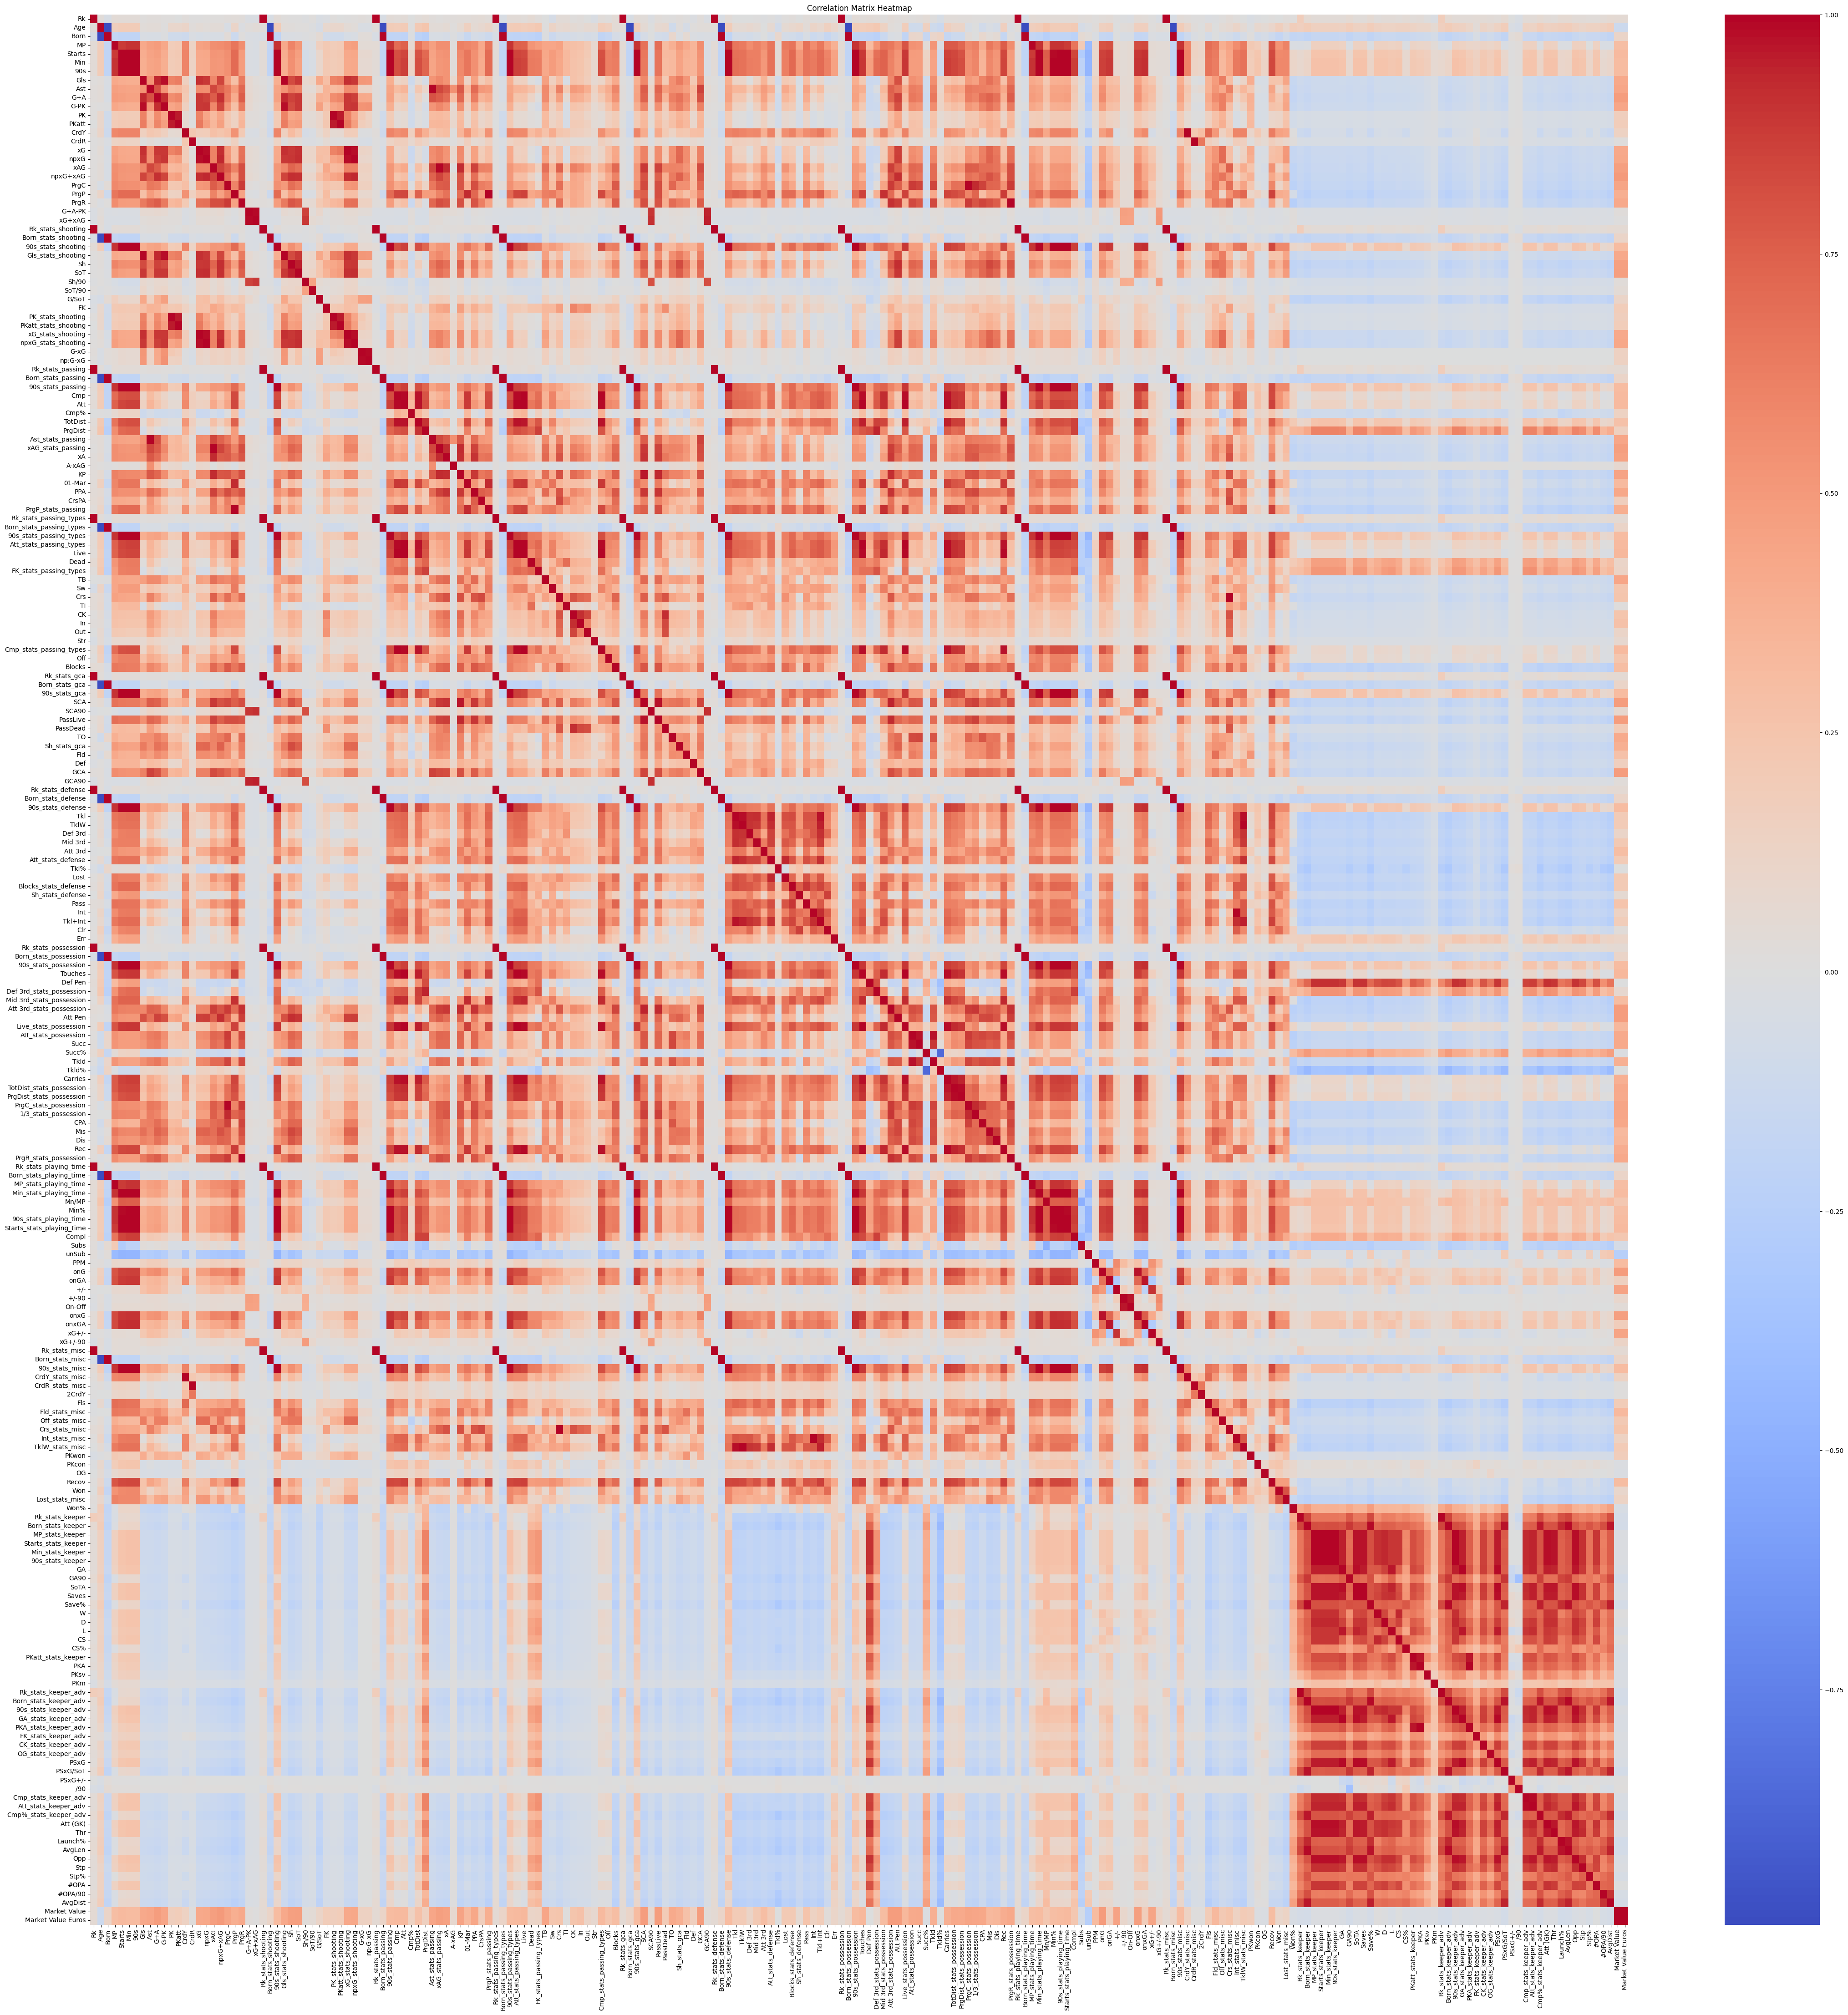

In [18]:
# Compute correlation matrix
correlation_matrix = players.corr()

# Dynamically adjust figure size based on number of columns
num_columns = correlation_matrix.shape[1]  # Get number of columns
fig_width = num_columns / 4  # Adjust width factor (experiment as needed)
fig_height = num_columns / 4  # Adjust height factor

# Plot heatmap
plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", xticklabels=True, yticklabels=True)

# Add title
plt.title("Correlation Matrix Heatmap")
plt.show()

### Listing *Market Value* & *Market Value Euros* as Target Columns

In [19]:
# List of target columns
target_columns = ['Market Value']

# Compute the pairwise correlation matrix
correlation_matrix = players.corr()

# Extract only the correlations of all columns with the target columns
target_correlations = correlation_matrix[target_columns]

/var/folders/00/tszrqkcj2jq4vf_4t2qvrr7h0000gn/T/ipykernel_12095/1902198488.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = players.corr()


### Setting Threshold for Columns Below 0.30 [Leaving 0.4 to 0.5 Values Highlighted]

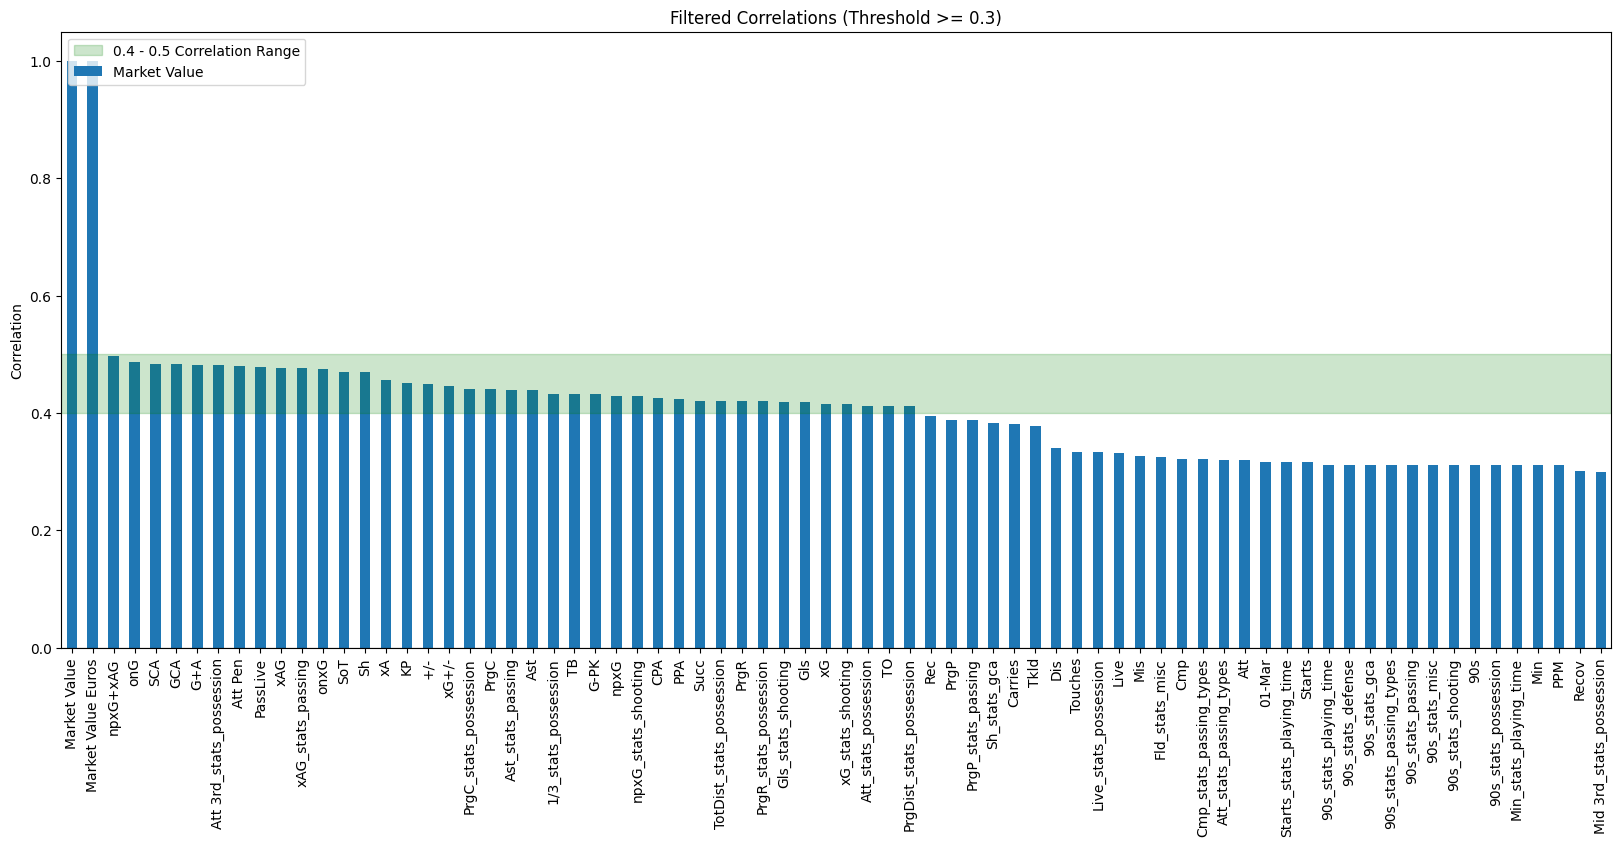

In [20]:
# Threshold for excluding low correlations
threshold = 0.3

# Only keep columns where absolute correlation >= threshold for either target column
filtered_correlations = target_correlations.loc[
    (target_correlations['Market Value'].abs() >= threshold)
]

# Sort the remaining correlations by absolute value for better readability
sorted_correlations = filtered_correlations.abs().sort_values(by=['Market Value'], ascending=False)

# Plot a bar chart for filtered and sorted correlations
ax = sorted_correlations.plot(kind='bar', figsize=(20, 8), title=f"Filtered Correlations (Threshold >= {threshold})")

# Highlight the range of interest (0.4 to 0.5)
plt.axhspan(0.4, 0.5, color='green', alpha=0.2, label="0.4 - 0.5 Correlation Range")  # Highlight range 0.4-0.5

# Set chart labels and formatting
plt.ylabel("Correlation")
plt.axhline(0, color='black', linewidth=0.8)  # Add a line at correlation = 0
plt.legend(loc="upper left") 

In [21]:
# Define the range for correlation values
lower_bound = 0.4
upper_bound = 0.5

# Filter features based on their correlation with "Market Value" or "Market Value Euros"
features_in_range = target_correlations[
    ((target_correlations['Market Value'] >= lower_bound) & (target_correlations['Market Value'] <= upper_bound))]

# Extract the feature names
features_list = features_in_range.index.tolist()

# Output the list of features
print("Features with correlation between 0.4 and 0.5:", features_list)

Features with correlation between 0.4 and 0.5: ['Gls', 'Ast', 'G+A', 'G-PK', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgR', 'Gls_stats_shooting', 'Sh', 'SoT', 'xG_stats_shooting', 'npxG_stats_shooting', 'Ast_stats_passing', 'xAG_stats_passing', 'xA', 'KP', 'PPA', 'TB', 'SCA', 'PassLive', 'TO', 'GCA', 'Att 3rd_stats_possession', 'Att Pen', 'Att_stats_possession', 'Succ', 'TotDist_stats_possession', 'PrgDist_stats_possession', 'PrgC_stats_possession', '1/3_stats_possession', 'CPA', 'PrgR_stats_possession', 'onG', '+/-', 'onxG', 'xG+/-']


# Building The Model (Random Forest/GridSearchCV)

In [22]:
# Define the features (X) and target (y)
selected_features = ['+/-', 'xG+/-', 'Att 3rd_stats_possession', 'Att Pen', 'npxG+xAG', 
                     'onG', 'SCA', 'PassLive', 'onxG']

X = players[selected_features]
y = players['Market Value']

In [23]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")

Training Set Shape: (1603, 9)
Test Set Shape: (401, 9)


In [24]:
# Standardize the features (fit on training set, transform both training and test sets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Define the hyperparameter grid (parameters to tune)
param_grid = {
    'n_estimators': [100, 150, 250, 300],   # Further increase estimators for stability
    'max_depth': [14, 16, 18, 20],             # Test deeper trees to analyze overfitting
    'min_samples_split': [10, 15, 20],       # Experiment with stricter splits
    'min_samples_leaf': [2, 3, 4, 5, 6],            # Lower leaf size to capture more fine-grained patterns
    'max_features': ['sqrt', 'log2', None],      # Test different ways to select features
}

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV
grid_search = GridSearchCV(
    estimator=random_forest,    # Model
    param_grid=param_grid,      # Hyperparameter grid
    scoring='neg_mean_squared_error',  # Evaluation metric (negated since GridSearch minimizes by default)
    cv=5,                       # Number of folds in cross-validation
    verbose=2,                  # Show progress while tuning
    n_jobs=-1                   # Parallel processing to speed up computation
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Extract and print the best parameters and score
print("Best Parameters:", grid_search.best_params_)  # Optimal hyperparameter values
print("Best Score (Negative MSE):", grid_search.best_score_)  # Best cross-validated score

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.7s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.8s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   1.2s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_est

[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.8s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   1.3s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   1.1s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   0.7s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=250; total time=   1.2s
[CV] END max_depth=14, max_featu

[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.8s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   1.3s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   0.7s
[CV] END max_depth=14, max_featu

[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.8s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   1.3s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   0.7s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=250; total time=   1.1s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=250; total time=   1.2s
[CV] END max_depth=14, max_featu

[CV] END max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=150; total time=   0.6s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=250; total time=   0.9s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=300; total time=   1.1s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=300; total time=   1.4s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=150; total time=   0.6s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=250; total time=   0.9s
[CV] END max_depth=14, max_featu

[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=250; total time=   1.0s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=150; total time=   0.6s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=250; total time=   1.3s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END max_depth=14, max_featu

[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=150; total time=   0.6s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=250; total time=   1.2s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=150; total time=   0.6s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=250; total time=   0.9s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=250; total time=   0.9s
[CV] END max_depth=14, max_featu

[CV] END max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   0.6s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=150; total time=   0.6s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=250; total time=   0.9s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=250; total time=   0.9s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=300; total time=   1.2s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=250; total time=   1.0s
[CV] END max_depth=14, max_featu

[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=250; total time=   0.9s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   1.1s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=150; total time=   0.6s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=250; total time=   0.9s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=300; total time=   1.3s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=16, max_featu

[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=250; total time=   0.9s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   1.1s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=150; total time=   0.6s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=150; total time=   0.6s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=250; total time=   1.0s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=300; total time=   1.3s
[CV] END max_depth=16, max_featu

[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=250; total time=   1.1s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=150; total time=   0.6s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250; total time=   0.9s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300; total time=   1.1s
[CV] END max_depth=16, max_featu

[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=150; total time=   0.6s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250; total time=   0.9s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250; total time=   0.9s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=150; total time=   0.5s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=150; total time=   0.5s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=250; total time=   0.9s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=300; total time=   1.1s
[CV] END max_depth=16, max_featu

[CV] END max_depth=16, max_features=None, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.7s
[CV] END max_depth=16, max_features=None, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.8s
[CV] END max_depth=16, max_features=None, min_samples_leaf=2, min_samples_split=20, n_estimators=150; total time=   1.1s
[CV] END max_depth=16, max_features=None, min_samples_leaf=2, min_samples_split=20, n_estimators=250; total time=   1.9s
[CV] END max_depth=16, max_features=None, min_samples_leaf=2, min_samples_split=20, n_estimators=250; total time=   2.0s
[CV] END max_depth=16, max_features=None, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   2.2s
[CV] END max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=150; total time=   1.2s
[CV] END max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=150; total time=   1.2s
[CV] END max_depth=16, max_featu

[CV] END max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=15, n_estimators=250; total time=   2.0s
[CV] END max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=15, n_estimators=300; total time=   2.4s
[CV] END max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=100; total time=   0.8s
[CV] END max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=100; total time=   0.7s
[CV] END max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=100; total time=   0.7s
[CV] END max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=150; total time=   1.0s
[CV] END max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=250; total time=   1.7s
[CV] END max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=300; total time=   2.0s
[CV] END max_depth=16, max_featu

[CV] END max_depth=16, max_features=None, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   2.1s
[CV] END max_depth=16, max_features=None, min_samples_leaf=4, min_samples_split=20, n_estimators=150; total time=   1.0s
[CV] END max_depth=16, max_features=None, min_samples_leaf=4, min_samples_split=20, n_estimators=150; total time=   1.0s
[CV] END max_depth=16, max_features=None, min_samples_leaf=4, min_samples_split=20, n_estimators=250; total time=   1.7s
[CV] END max_depth=16, max_features=None, min_samples_leaf=4, min_samples_split=20, n_estimators=300; total time=   2.1s
[CV] END max_depth=16, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END max_depth=16, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END max_depth=16, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   1.0s
[CV] END max_depth=16, max_featu

[CV] END max_depth=16, max_features=None, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   0.7s
[CV] END max_depth=16, max_features=None, min_samples_leaf=4, min_samples_split=15, n_estimators=150; total time=   1.0s
[CV] END max_depth=16, max_features=None, min_samples_leaf=4, min_samples_split=15, n_estimators=250; total time=   2.0s
[CV] END max_depth=16, max_features=None, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   2.2s
[CV] END max_depth=16, max_features=None, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.7s
[CV] END max_depth=16, max_features=None, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.7s
[CV] END max_depth=16, max_features=None, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.7s
[CV] END max_depth=16, max_features=None, min_samples_leaf=4, min_samples_split=20, n_estimators=150; total time=   1.0s
[CV] END max_depth=16, max_featu

[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=150; total time=   0.5s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=250; total time=   0.9s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=300; total time=   1.1s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   1.1s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END max_depth=18, max_featu

[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=150; total time=   0.5s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=250; total time=   0.9s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=300; total time=   1.1s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.7s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   1.0s
[CV] END max_depth=18, max_featu

[CV] END max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=15, n_estimators=250; total time=   1.0s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=15, n_estimators=250; total time=   1.0s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=15, n_estimators=300; total time=   1.1s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=20, n_estimators=150; total time=   0.6s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=20, n_estimators=150; total time=   0.6s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=20, n_estimators=250; total time=   0.9s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=20, n_estimators=300; total time=   1.1s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=18, max_featu

[CV] END max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=20, n_estimators=250; total time=   1.0s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=20, n_estimators=250; total time=   1.0s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=20, n_estimators=300; total time=   1.1s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   1.0s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=18, max_featu

[CV] END max_depth=18, max_features=None, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END max_depth=18, max_features=None, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.7s
[CV] END max_depth=18, max_features=None, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.7s
[CV] END max_depth=18, max_features=None, min_samples_leaf=6, min_samples_split=15, n_estimators=150; total time=   1.0s
[CV] END max_depth=18, max_features=None, min_samples_leaf=6, min_samples_split=15, n_estimators=250; total time=   1.7s
[CV] END max_depth=18, max_features=None, min_samples_leaf=6, min_samples_split=15, n_estimators=300; total time=   2.0s
[CV] END max_depth=18, max_features=None, min_samples_leaf=6, min_samples_split=20, n_estimators=100; total time=   0.6s
[CV] END max_depth=18, max_features=None, min_samples_leaf=6, min_samples_split=20, n_estimators=100; total time=   0.6s
[CV] END max_depth=18, max_featu

[CV] END max_depth=18, max_features=None, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.7s
[CV] END max_depth=18, max_features=None, min_samples_leaf=5, min_samples_split=15, n_estimators=150; total time=   1.1s
[CV] END max_depth=18, max_features=None, min_samples_leaf=5, min_samples_split=15, n_estimators=250; total time=   1.7s
[CV] END max_depth=18, max_features=None, min_samples_leaf=5, min_samples_split=15, n_estimators=300; total time=   2.1s
[CV] END max_depth=18, max_features=None, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   0.7s
[CV] END max_depth=18, max_features=None, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   0.7s
[CV] END max_depth=18, max_features=None, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   0.6s
[CV] END max_depth=18, max_features=None, min_samples_leaf=5, min_samples_split=20, n_estimators=150; total time=   1.0s
[CV] END max_depth=18, max_featu

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=150; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=250; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=250; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=250; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=150; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=150; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=250; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   1.2s
[CV] END max_depth=20, max_featu

Best Parameters: {'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 250}
Best Score (Negative MSE): -188125479.10762084


In [26]:
# Train the Random Forest with Best Parameters
best_random_forest = RandomForestRegressor(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    max_features=grid_search.best_params_['max_features'],
    random_state=42
)

# Retrain the best model
best_random_forest.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_pred_best_rf = best_random_forest.predict(X_test_scaled)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Optimized Random Forest MAE: {mae_best_rf:.2f}")
print(f"Optimized Random Forest R²: {r2_best_rf:.2f}")

Optimized Random Forest MAE: 8365.50
Optimized Random Forest R²: 0.31


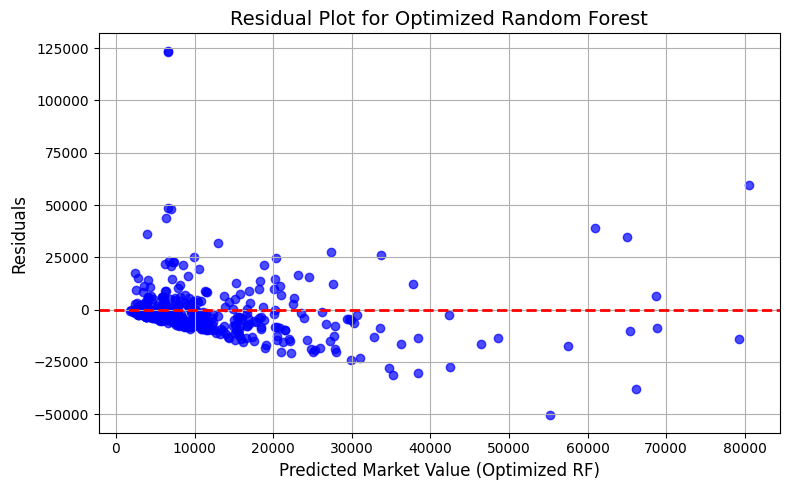

In [27]:
# Predict on the test set
y_pred_best_rf = best_random_forest.predict(X_test_scaled)

# Calculate residuals for the optimized Random Forest
residuals_rf_best = y_test - y_pred_best_rf

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_best_rf, residuals_rf_best, alpha=0.7, color="blue")
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted Market Value (Optimized RF)", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residual Plot for Optimized Random Forest", fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

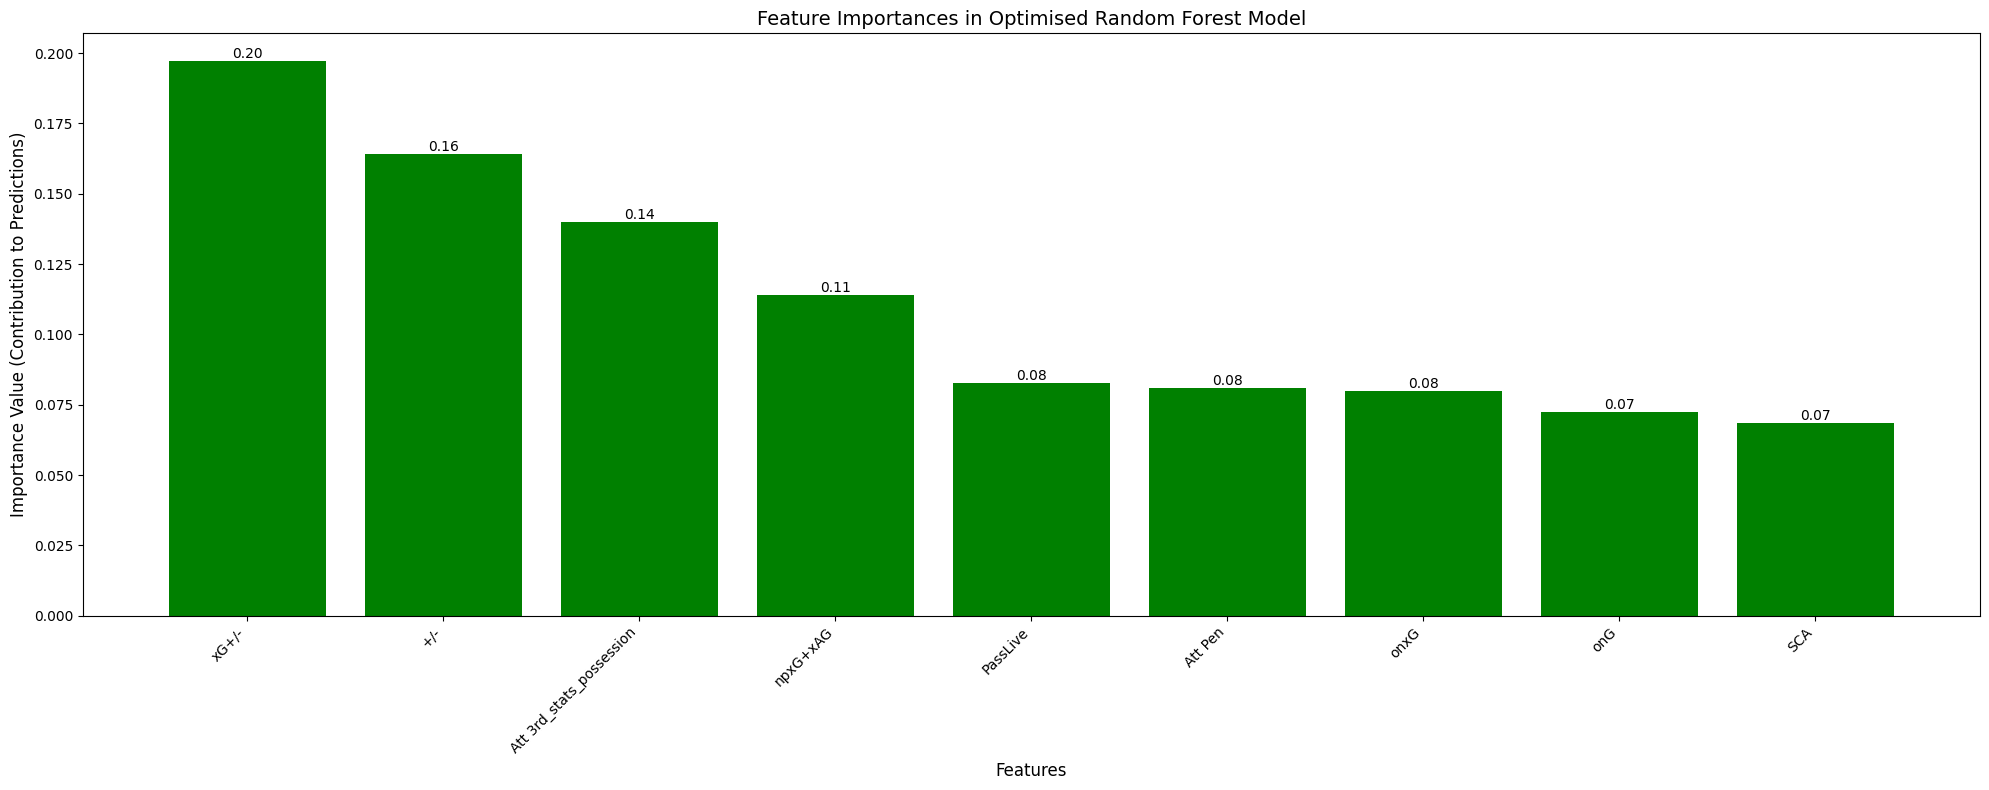

In [28]:
# Feature names and their importances from the optimized Random Forest
features = selected_features # Replace this with the list of features used in your model
importances = best_random_forest.feature_importances_  # Extract feature importances from optimized RF

# Sort feature importances for better display
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Create a bar chart for feature importances
plt.figure(figsize=(20, 8))
bars = plt.bar(feature_importances['Feature'], feature_importances['Importance'], 
               color=['green' if imp > 0 else 'red' for imp in feature_importances['Importance']])

# Add labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Chart formatting
plt.title('Feature Importances in Optimised Random Forest Model', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Value (Contribution to Predictions)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate feature labels for better readability
plt.tight_layout()
plt.show()

In [29]:
# Extract feature importances
importances = best_random_forest.feature_importances_

# Match feature names with their importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,    # Feature names
    'Importance': importances      # Corresponding importance scores
})

# Sort features by importance (descending)
sorted_feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(sorted_feature_importances)

# Convert important features to a Python list
important_features = sorted_feature_importances['Feature'].tolist()

# Output the list of features
print("Important Features:", important_features)

                    Feature  Importance
1                     xG+/-    0.197187
0                       +/-    0.164120
2  Att 3rd_stats_possession    0.140024
4                  npxG+xAG    0.114155
7                  PassLive    0.082706
3                   Att Pen    0.081029
8                      onxG    0.079968
5                       onG    0.072448
6                       SCA    0.068363
Important Features: ['xG+/-', '+/-', 'Att 3rd_stats_possession', 'npxG+xAG', 'PassLive', 'Att Pen', 'onxG', 'onG', 'SCA']


In [30]:
# Define the refined GridSearch hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [300, 500, 700],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.8],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
}

# Initialize XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',        # Maximize R² Score
    cv=5,                # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Perform GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Extract the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (Cross-Validation):", grid_search.best_score_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_

# Add Early Stopping
best_model.fit(
    X_train_scaled,
    y_train,
    early_stopping_rounds=25,
    eval_set=[(X_test_scaled, y_test)],
    eval_metric="rmse"
)
y_pred = best_model.predict(X_test_scaled)

# Evaluate performance on test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Final Mean Squared Error (MSE): {mse}")
print(f"Final R² Score: {r2}")

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=150; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=150; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=250; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=300; total time=   1.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_e

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.8; total time=   0.7s[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=250; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_d

[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=150; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=250; total time=   1.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=300; total time=   1.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=250; total time=   1.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=150; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=250; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=250; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=300; total time=   1.1s
[CV] END max_depth=20, max_featu


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0.1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   0.8s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0.1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, ga

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamm

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, subsample=0.7; total time=   0.8s
[CV] END col

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.8s
[CV] E

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   1.7s
[CV] END colsa

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   1.6s
[CV] END col

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   1.3s
[CV] END c

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   2.0s
[CV] END col

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.8; total time=   0.3s
[CV] END colsample

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.5, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.3s
[CV] END colsam

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   1.7s
[CV] END colsample_by

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   0.3s
[CV] END colsa

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   0.5s
[CV] END col

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   0.5s
[CV] E

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.5, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.5s
[CV] END c

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.8; total time=   0.5s
[CV] END colsa

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   0.7s
[CV] END col

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, subsample=0.7; total time=   0.5s
[CV] END

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   0.8s
[CV] END colsample_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   0.7s
[CV] END colsampl

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   0.9s
[CV] END colsampl

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   0.9s
[CV] END colsample_by

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   1.1s
[CV] END colsample_byt

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   1.5s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   1.6s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   1.6s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   1.7s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   2.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   2.4s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   1.5s
[CV] END colsample_b

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   1.2s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   1.9s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   2.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   2.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   1.5s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   2.3s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   2.5s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   1.6s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   1.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   1.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.9, gamm

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   3.4s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   2.3s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   2.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   2.3s
[CV] END colsample_bytree=0.9, ga

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   2.7s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   2.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   2.8s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   2.0s
[CV] END colsample_bytree=0.9, ga

[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   1.4s
[CV] END

[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   1.7s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0.1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.6s
[CV] E

[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.8; total time=   0.5s
[CV] END colsa

[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   2.3s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   2.1s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   2.2s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   2.3s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   3.0s
[CV] END

[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   3.4s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   3.4s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   3.1s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.5s
[CV] END col

[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   1.3s
[CV] END colsample_

[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   0.9s
[CV] END colsam

[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   2.4s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   2.0s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   2.1s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   0.6s
[CV] END colsa

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   0.6s
[CV] END colsa

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   0.6s
[CV] END colsa

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   0.6s
[CV] END colsa

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   0.9s
[CV] E

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   1.3s
[CV] END colsa

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   1.2s
[CV] END colsa

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   0.8s
[CV] END colsampl

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.6s
[CV] END cols

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   1.3s
[CV] END colsample_by

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   1.8s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   1.4s
[CV] END colsam

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=1.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   1.4s
[CV] END colsample_bytree=1.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.5; total time=   0.8s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   1.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   2.1s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.4s[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, ga

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamm

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.8; total time=   0.6s
[CV] END cols

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   1.6s
[CV] END colsa

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=700, reg_alpha=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   0.4s
[CV] END

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsa

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   1.7s
[CV] END col

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   2.2s
[CV] END colsa

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.8; total time=   0.6s
[CV] END colsample_by

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.7; total time=   0.9s
[CV] END colsam

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   1.1s
[CV] END colsampl

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, reg_alpha=0.1, subsample=0.7; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0.1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=700, reg_alpha=0.5, subsample=0.5; total time=   0.8s
[CV] END c

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=300, reg_alpha=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   1.0s
[CV] END col

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.5; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=700, reg_alpha=0.1, subsample=0.7; total time=   1.4s
[CV] END colsa

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=500, reg_alpha=0.5, subsample=0.7; total time=   0.7s
[CV] END

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0.5, 'subsample': 0.5}
Best R² Score (Cross-Validation): 0.37824346236628553
[0]	validation_0-rmse:20558.75686
[1]	validation_0-rmse:20422.82180
[2]	validation_0-rmse:20316.90521
[3]	validation_0-rmse:20209.07578
[4]	validation_0-rmse:20108.78299
[5]	validation_0-rmse:20004.82021
[6]	validation_0-rmse:19905.02688
[7]	validation_0-rmse:19793.61651
[8]	validation_0-rmse:19691.47647
[9]	validation_0-rmse:19592.27081
[10]	validation_0-rmse:19502.24786
[11]	validation_0-rmse:19414.89874
[12]	validation_0-rmse:19309.52234
[13]	validation_0-rmse:19230.34512
[14]	validation_0-rmse:19137.31078
[15]	validation_0-rmse:19038.42101
[16]	validation_0-rmse:18938.57343
[17]	validation_0-rmse:18836.87947
[18]	validation_0-rmse:18744.01847
[19]	validation_0-rmse:18652.55378
[20]	validation_0-rmse:18568.72358
[21]	validation_0-rmse:18471.51093
[22]	validation_0-rmse:18361.68450


/Users/lukewalker/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/lukewalker/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:18266.04643
[24]	validation_0-rmse:18191.73799
[25]	validation_0-rmse:18109.73714
[26]	validation_0-rmse:18026.62100
[27]	validation_0-rmse:17959.90927
[28]	validation_0-rmse:17893.14960
[29]	validation_0-rmse:17825.47730
[30]	validation_0-rmse:17746.84318
[31]	validation_0-rmse:17671.16460
[32]	validation_0-rmse:17612.63356
[33]	validation_0-rmse:17545.07922
[34]	validation_0-rmse:17478.77036
[35]	validation_0-rmse:17413.43168
[36]	validation_0-rmse:17353.49303
[37]	validation_0-rmse:17271.70455
[38]	validation_0-rmse:17183.55443
[39]	validation_0-rmse:17109.13629
[40]	validation_0-rmse:17052.99950
[41]	validation_0-rmse:16993.45090
[42]	validation_0-rmse:16940.47382
[43]	validation_0-rmse:16876.86891
[44]	validation_0-rmse:16830.76477
[45]	validation_0-rmse:16767.14261
[46]	validation_0-rmse:16719.11690
[47]	validation_0-rmse:16674.40347
[48]	validation_0-rmse:16618.30688
[49]	validation_0-rmse:16578.20668
[50]	validation_0-rmse:16522.52516
[51]	validation_0-rm

[253]	validation_0-rmse:14013.33078
Final Mean Squared Error (MSE): 195548877.91529956
Final R² Score: 0.3431782684748548


In [35]:
# Initialize and train the Lasso regression model
alpha_value = 0.1  # Regularization strength (you can tune this later)
lasso = Lasso(alpha=alpha_value)  # Initialize Lasso with a specific alpha
lasso.fit(X_train_scaled, y_train)  # Train the Lasso regression model

# Print Lasso model coefficients for interpretation
print("\nLasso Model Coefficients:")
for feature, coef in zip(selected_features, lasso.coef_):
    print(f"{feature}: {coef}")


Lasso Model Coefficients:
+/-: 29039.497809455293
xG+/-: 26543.137650557645
Att 3rd_stats_possession: 9701.906972332761
Att Pen: 30561.565615555497
npxG+xAG: 10010.79446750833
onG: 5446.515886824505
SCA: 27451.944691393943
PassLive: -15886.820353734065
onxG: 5692.896537778002


In [36]:
# Predictions
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate metrics
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso)

print("\nLasso Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Lasso Model Performance:
Mean Absolute Error (MAE): 9163.25
Mean Squared Error (MSE): 227426372.48
Root Mean Squared Error (RMSE): 15080.66
R-squared (R²): 0.24


In [37]:
# Assuming 'players' is your DataFrame
# Be sure your dataset has matches played (MP), otherwise substitute with relevant denominators.

# ============================
# 1. Goals + Assists Features
# ============================
# Per Game Metrics
players['Goals_Per_Game'] = players['Gls'] / players['MP']
players['Assists_Per_Game'] = players['Ast'] / players['MP']
players['Goal_Contributions_Per_Game'] = players['G+A'] / players['MP']

# Percentages and Ratios
players['Non_Penalty_Goals_Percentage'] = players['G-PK'] / (players['Gls'] + 1e-8)
players['Goal_to_Assist_Ratio'] = players['Gls'] / (players['Ast'] + 1e-8)

# Expected Overperformance/Underperformance
players['Goals_vs_xG'] = players['Gls'] - players['xG']
players['Assists_vs_xAG'] = players['Ast'] - players['xAG']
players['Total_vs_Expected'] = players['G+A'] - (players['xG'] + players['xAG'])

# Offensive Impact
players['Offensive_Impact'] = players['xG'] + players['xAG']
players['Non_Penalty_Offensive_Impact'] = players['npxG+xAG']

# ============================
# 2. Shooting Features
# ============================
# Shooting Efficiency
players['Goals_Per_Shot'] = players['Gls_stats_shooting'] / (players['Sh'] + 1e-8)
players['Goals_Per_Shot_On_Target'] = players['Gls_stats_shooting'] / (players['SoT'] + 1e-8)

# Shot Accuracy
players['Shot_Accuracy'] = players['SoT'] / (players['Sh'] + 1e-8)

# Shooting Efficiency vs. Expected Goals
players['Shooting_Efficiency'] = players['Gls_stats_shooting'] / (players['xG_stats_shooting'] + 1e-8)
players['Non_Penalty_Shooting_Efficiency'] = players['npxG_stats_shooting'] / (players['npxG'] + 1e-8)

# Shooting Activity
players['Shots_Per_Game'] = players['Sh'] / players['MP']
players['Shots_on_Target_Per_Game'] = players['SoT'] / players['MP']

# ============================
# 3. Passing Features
# ============================
# Playmaking Efficiency
players['Key_Passes_to_Assist_Rate'] = players['Ast_stats_passing'] / (players['KP'] + 1e-8)
players['xA_Per_Key_Pass'] = players['xA'] / (players['KP'] + 1e-8)

# Final Third Passing
players['Passes_to_Box_Percentage'] = players['PPA'] / (players['KP'] + 1e-8)
players['Progressive_Passes_Percentage'] = players['PrgC'] / (players['PassLive'] + 1e-8)

# Expected vs Actual Assists
players['Assists_vs_xA'] = players['Ast'] - players['xA']

# ============================
# 4. Progressive and Possession Features
# ============================
# Shot and Goal Creating Actions Per Game
players['SCA_Per_Game'] = players['SCA'] / players['MP']
players['GCA_Per_Game'] = players['GCA'] / players['MP']

# Involvement in Progressive Actions
players['Progressive_Passing_Contribution'] = players['PrgC'] / (players['PrgC'] + players['PrgR'] + 1e-8)
players['PrgR_Per_Game'] = players['PrgR'] / players['MP']

# ============================
# 5. Possession and Ball Carrying Features
# ============================
# Penetrating Pass Completion Rate
players['Att_Penetration_Rate'] = players['Att Pen'] / (players['Att_stats_possession'] + 1e-8)

# Distance-Based Features
players['Progressive_Distance_Ratio'] = players['PrgDist_stats_possession'] / (players['TotDist_stats_possession'] + 1e-8)

# Carries Per Progressive Action
players['Carries_Per_Progressive_Action'] = players['PrgC_stats_possession'] / (players['1/3_stats_possession'] + 1e-8)

# ============================
# 6. Miscellaneous Features
# ============================
# On-Field Impact Efficiency
players['On_Field_Goal_Differential_Per_90'] = players['+/-'] / players['MP']
players['On_xG_Differential_Per_Game'] = players['onxG'] / players['MP']

# Impact vs. Expected
players['xG_Impact_Difference'] = players['onxG'] - players['xG+/-']

# ============================
# 7. Cross-Category & Holistic Features
# ============================
# Offensive vs Possession Contributions
players['Offensive_to_Possession_Ratio'] = players['G+A'] / (players['TotDist_stats_possession'] + 1e-8)

# Shooting vs Progressive Passing
players['Shooting_to_Progressive_Passing'] = players['Sh'] / (players['PrgC'] + 1e-8)

# ============================
# Check New Features
# ============================
# Optional: Correlation of engineered features with Market Value
engineered_features = [
    'Goals_Per_Game', 'Assists_Per_Game', 'Goal_Contributions_Per_Game', 'Non_Penalty_Goals_Percentage',
    'Goal_to_Assist_Ratio', 'Goals_vs_xG', 'Assists_vs_xAG', 'Total_vs_Expected', 'Offensive_Impact',
    'Non_Penalty_Offensive_Impact', 'Goals_Per_Shot', 'Goals_Per_Shot_On_Target', 'Shot_Accuracy',
    'Shooting_Efficiency', 'Non_Penalty_Shooting_Efficiency', 'Shots_Per_Game', 'Shots_on_Target_Per_Game',
    'Key_Passes_to_Assist_Rate', 'xA_Per_Key_Pass', 'Passes_to_Box_Percentage', 'Progressive_Passes_Percentage',
    'Assists_vs_xA', 'SCA_Per_Game', 'GCA_Per_Game', 'Progressive_Passing_Contribution', 'PrgR_Per_Game',
    'Att_Penetration_Rate', 'Progressive_Distance_Ratio', 'Carries_Per_Progressive_Action',
    'On_Field_Goal_Differential_Per_90', 'On_xG_Differential_Per_Game', 'xG_Impact_Difference',
    'Offensive_to_Possession_Ratio', 'Shooting_to_Progressive_Passing'
]

# Check correlations with the target variable
correlations = players[engineered_features + ['Market Value']].corr()['Market Value'].sort_values(ascending=False)
print("Top Correlated Engineered Features with Market Value:")
print(correlations.head(10))

Top Correlated Engineered Features with Market Value:
Market Value                         1.000000
Non_Penalty_Offensive_Impact         0.496689
Offensive_Impact                     0.484477
SCA_Per_Game                         0.443079
On_xG_Differential_Per_Game          0.428446
Shots_Per_Game                       0.417223
Goal_Contributions_Per_Game          0.414450
Shots_on_Target_Per_Game             0.408930
GCA_Per_Game                         0.389257
On_Field_Goal_Differential_Per_90    0.367534
Name: Market Value, dtype: float64


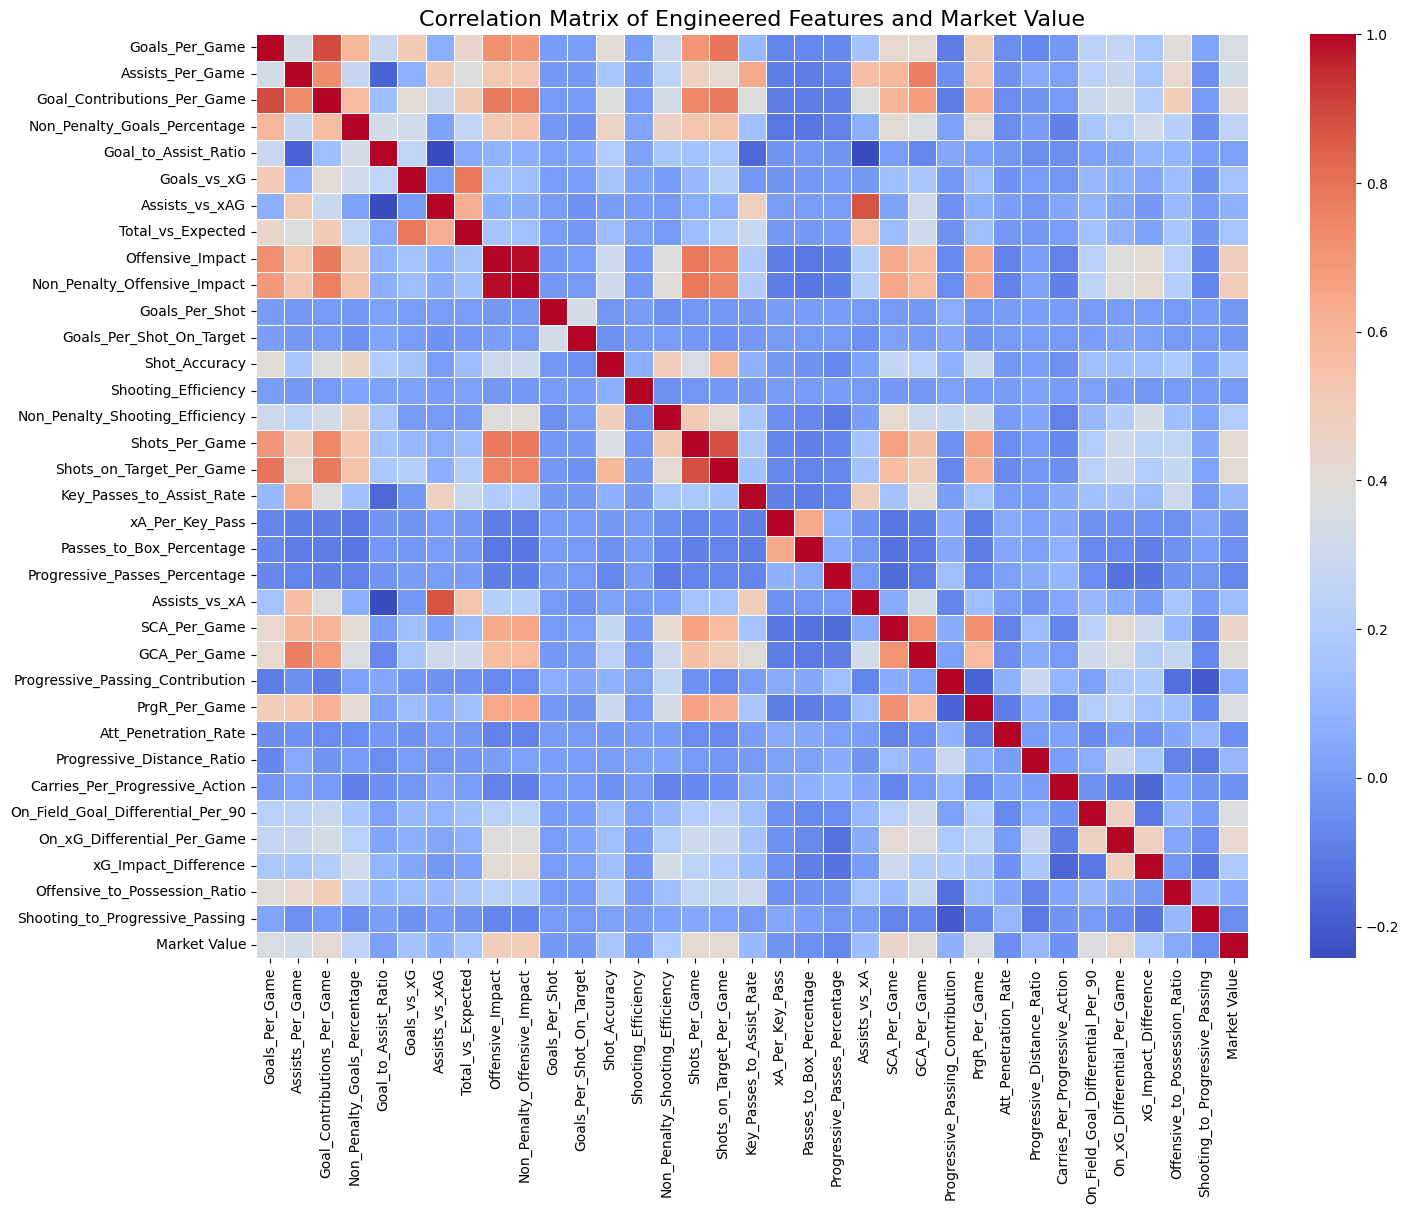

In [38]:
# Create a list of engineered features + the target
engineered_features = [
    'Goals_Per_Game', 'Assists_Per_Game', 'Goal_Contributions_Per_Game', 'Non_Penalty_Goals_Percentage',
    'Goal_to_Assist_Ratio', 'Goals_vs_xG', 'Assists_vs_xAG', 'Total_vs_Expected', 'Offensive_Impact',
    'Non_Penalty_Offensive_Impact', 'Goals_Per_Shot', 'Goals_Per_Shot_On_Target', 'Shot_Accuracy',
    'Shooting_Efficiency', 'Non_Penalty_Shooting_Efficiency', 'Shots_Per_Game', 'Shots_on_Target_Per_Game',
    'Key_Passes_to_Assist_Rate', 'xA_Per_Key_Pass', 'Passes_to_Box_Percentage', 'Progressive_Passes_Percentage',
    'Assists_vs_xA', 'SCA_Per_Game', 'GCA_Per_Game', 'Progressive_Passing_Contribution', 'PrgR_Per_Game',
    'Att_Penetration_Rate', 'Progressive_Distance_Ratio', 'Carries_Per_Progressive_Action',
    'On_Field_Goal_Differential_Per_90', 'On_xG_Differential_Per_Game', 'xG_Impact_Difference',
    'Offensive_to_Possession_Ratio', 'Shooting_to_Progressive_Passing',
    'Market Value'  # Include the target variable
]

# Subset the relevant columns for correlation analysis
data_for_correlation = players[engineered_features]

# Compute the correlation matrix
correlation_matrix = data_for_correlation.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(16, 12))

# Use seaborn to plot the heatmap
sns.heatmap(
    correlation_matrix, 
    annot=False,   # Set to True to see exact correlation values
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5
)

plt.title("Correlation Matrix of Engineered Features and Market Value", fontsize=16)
plt.show()